# ✈️ Exploratory Data Analysis: Flights Dataset
**Author:** Sabri Hamdaoui  
**Date:** June 2025  
**Purpose:**  
Explore international airline passenger traffic trends over time using the `flights` dataset from seaborn. The goal is to identify seasonal trends, patterns, and year-over-year changes in passenger volume.


## 📦 Import Libraries and Load Data


In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'flights' dataset from seaborn
df = sns.load_dataset("flights")

# Show the first 5 rows
df.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## 🔍 Step 1: Initial Data Inspection


In [3]:
# Show the first 10 rows
print(df.head(10))

# Show the number of rows and columns
print("\nShape of dataset:", df.shape)

# Show the data types for each column
print("\nData types:")
print(df.dtypes)


   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
5  1949   Jun         135
6  1949   Jul         148
7  1949   Aug         148
8  1949   Sep         136
9  1949   Oct         119

Shape of dataset: (144, 3)

Data types:
year             int64
month         category
passengers       int64
dtype: object


## 📊 Step 2: Descriptive Statistics


In [4]:
# Show descriptive statistics for numerical columns
df.describe()


,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


## 📈 Step 3: Data Distribution - Numeric Columns


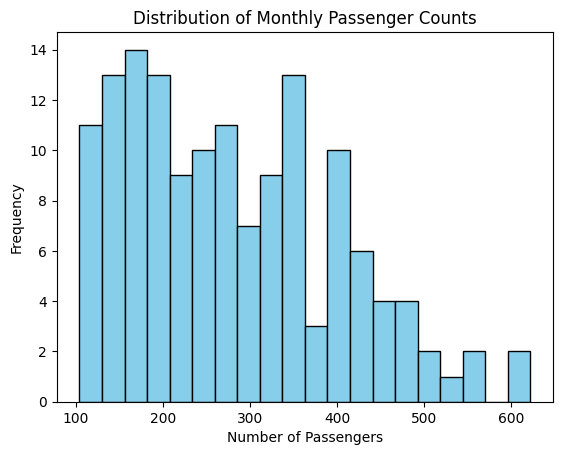

In [5]:
# Plot histogram of passengers
df['passengers'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Monthly Passenger Counts")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()


## 🧮 Step 4: Data Distribution - Categorical Columns


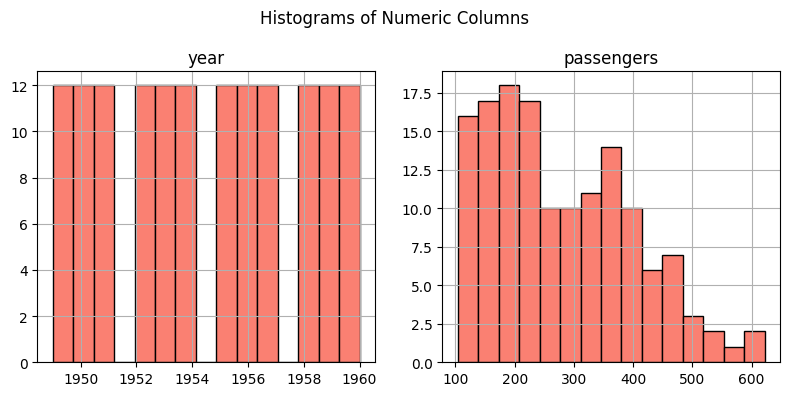

In [6]:
# Plot histograms for all numeric columns
df.hist(figsize=(8, 4), bins=15, edgecolor='black', color='salmon')
plt.suptitle("Histograms of Numeric Columns")
plt.tight_layout()
plt.show()


## 🛠️ Step 5: Data Transformation & Feature Engineering


month
Jan    12
Feb    12
Mar    12
Apr    12
May    12
Jun    12
Jul    12
Aug    12
Sep    12
Oct    12
Nov    12
Dec    12
Name: count, dtype: int64


C:\Users\sabri\AppData\Local\Temp\ipykernel_9256\421741973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


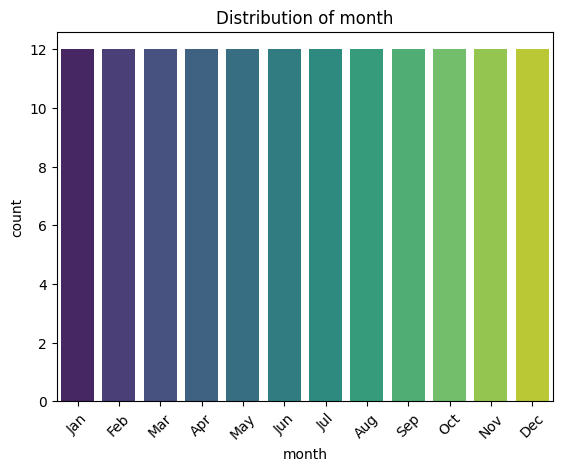

In [7]:
# Value counts for the 'month' column
print(df['month'].value_counts())

# Plot countplot for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [8]:
# Rename the 'passengers' column
df.rename(columns={"passengers": "num_passengers"}, inplace=True)

# Add new column: Month as a number (1 to 12)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month_num'] = df['month'].apply(lambda x: month_order.index(x) + 1)

# Preview result
df.head()


,year,month,num_passengers,month_num
0,1949,Jan,112,1
1,1949,Feb,118,2
2,1949,Mar,132,3
3,1949,Apr,129,4
4,1949,May,121,5


# 📊 Step 6: Visual Explorations

## 📈 Visualization 1: Trend of Passengers Over the Years

**Goal:**  
Explore the growth in the number of airline passengers over time.

**Chart Type:**  
Line chart showing total passengers per year.


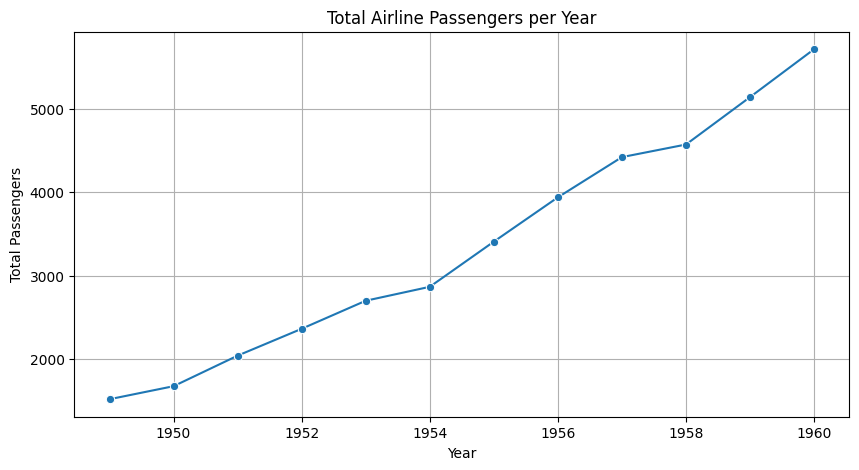

In [9]:
# Group by year and sum the number of passengers
yearly_data = df.groupby('year')['num_passengers'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='num_passengers', data=yearly_data, marker='o')
plt.title("Total Airline Passengers per Year")
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.grid(True)
plt.show()


**Story:**  
The line chart clearly shows a consistent upward trend in airline passengers from 1949 to 1960. This suggests a growing demand for air travel during the post-war period.



## 📊 Visualization 2: Average Passengers per Month (Seasonality)

**Goal:**  
Analyze seasonal travel patterns by calculating the average number of passengers for each month across all years.

**Chart Type:**  
Bar chart showing average passengers per month.


C:\Users\sabri\AppData\Local\Temp\ipykernel_9256\932735031.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = df.groupby('month')[['num_passengers']].mean().reindex([
C:\Users\sabri\AppData\Local\Temp\ipykernel_9256\932735031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y='num_passengers', data=monthly_avg, palette='crest')


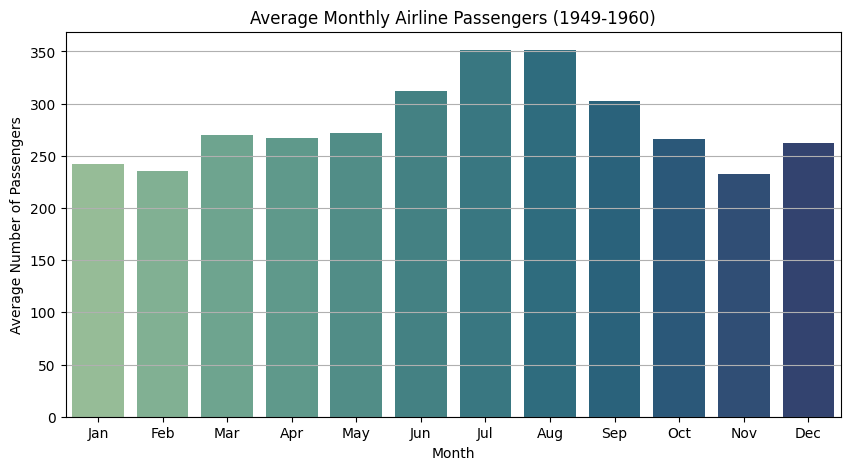

In [11]:
# Group by month and calculate the mean passengers
monthly_avg = df.groupby('month')[['num_passengers']].mean().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y='num_passengers', data=monthly_avg, palette='crest')
plt.title("Average Monthly Airline Passengers (1949-1960)")
plt.xlabel("Month")
plt.ylabel("Average Number of Passengers")
plt.grid(axis='y')
plt.show()


**Story:**  
This bar chart reveals clear seasonality in air travel. Passenger numbers peak during the summer months (July and August), indicating a rise in travel demand during vacation periods. Lower activity is observed during the early part of the year, especially in February.


## 🌡️ Visualization 3: Heatmap of Monthly Passenger Counts Over the Years

**Goal:**  
Visualize how passenger volume changes across both months and years simultaneously.

**Chart Type:**  
Heatmap showing passenger counts by year and month.


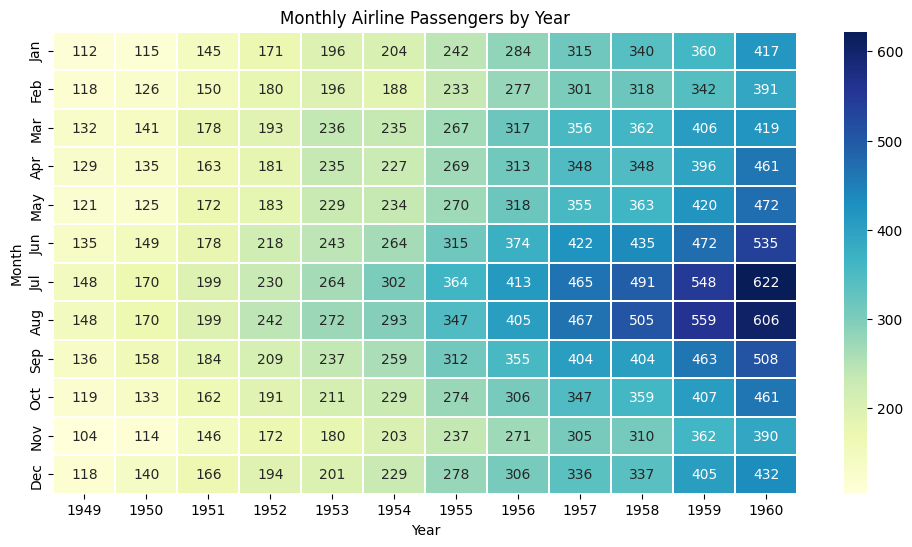

In [12]:
# Pivot the dataset to prepare for heatmap
heatmap_data = df.pivot(index='month', columns='year', values='num_passengers')

# Reorder months to be Jan-Dec
heatmap_data = heatmap_data.reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3, annot=True, fmt='d')
plt.title("Monthly Airline Passengers by Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()


**Story:**  
The heatmap reveals both the long-term growth in airline passengers and the seasonal peaks each year. From 1949 to 1960, the number of passengers steadily increased, particularly in the summer months (June–August), confirming a clear pattern of seasonal and annual growth.


# 📌 Conclusion

This analysis revealed that air travel grew consistently from 1949 to 1960. There is a strong seasonality effect, with peaks in the summer months. The findings demonstrate how effective EDA tools like pandas, seaborn, and matplotlib can be in identifying patterns in time series data.
